In [2]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
import hist
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
%matplotlib notebook

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [4]:
fileName="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225819/0000/ntuples.root"
fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225832/0000/ntuples.root"
fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/ntuples.root"
fileNameDelta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
fileNameE50Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225716/0000/ntuples.root"
#fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225726/0000/ntuples.root"
#fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225737/0000/ntuples.root"
fileNameE50Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225808/0000/ntuples.root"
file=uproot.open(fileName)
fileDelta2p5=uproot.open(fileNameDelta2p5)
fileDelta3=uproot.open(fileNameDelta3)
fileDelta5=uproot.open(fileNameDelta5)
fileE50Delta2=uproot.open(fileNameE50Delta2)
fileE50Delta5=uproot.open(fileNameE50Delta5)

In [5]:
tracksters=file["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()
"""
trackstersD2p5=fileDelta2p5["ana/tracksters"]
verticesD2p5_E = trackstersD2p5['vertices_energy'].array()
verticesD2p5_indexes = trackstersD2p5['vertices_indexes'].array()
verticesD2p5_x = trackstersD2p5['vertices_x'].array()
verticesD2p5_y = trackstersD2p5['vertices_y'].array()
verticesD2p5_z = trackstersD2p5['vertices_z'].array()
verticesD2p5_layers=trackstersD2p5['vertices_layer'].array()
tracksterD2p5_E=trackstersD2p5['raw_energy'].array()
tracksterD2p5_EReg=trackstersD2p5['regressed_energy'].array()
tracksterD2p5_phi=trackstersD2p5['trackster_barycenter_phi'].array()
tracksterD2p5_eta=trackstersD2p5['trackster_barycenter_eta'].array()

trackstersD3=fileDelta3["ana/tracksters"]
verticesD3_E = trackstersD3['vertices_energy'].array()
verticesD3_indexes = trackstersD3['vertices_indexes'].array()
tracksterD3_E=trackstersD3['raw_energy'].array()
"""

trackstersD5=fileDelta5["ana/tracksters"]
verticesD5_E = trackstersD5['vertices_energy'].array()
verticesD5_indexes = trackstersD5['vertices_indexes'].array()
verticesD5_x = trackstersD5['vertices_x'].array()
verticesD5_y = trackstersD5['vertices_y'].array()
verticesD5_z = trackstersD5['vertices_z'].array()
verticesD5_layers=trackstersD5['vertices_layer'].array()
tracksterD5_E=trackstersD5['raw_energy'].array()
tracksterD5_EReg=trackstersD5['regressed_energy'].array()
tracksterD5_phi=trackstersD5['trackster_barycenter_phi'].array()
tracksterD5_eta=trackstersD5['trackster_barycenter_eta'].array()

trackstersE50D2=fileE50Delta2["ana/tracksters"]
verticesE50D2_E = trackstersE50D2['vertices_energy'].array()
verticesE50D2_indexes = trackstersE50D2['vertices_indexes'].array()
tracksterE50D2_E=trackstersE50D2['raw_energy'].array()
verticesE50D2_x = trackstersE50D2['vertices_x'].array()
verticesE50D2_y = trackstersE50D2['vertices_y'].array()
verticesE50D2_z = trackstersE50D2['vertices_z'].array()
#vertices_layers=tracksters['vertices_layer'].array()

trackstersE50D5=fileE50Delta5["ana/tracksters"]
verticesE50D5_E = trackstersE50D5['vertices_energy'].array()
verticesE50D5_indexes = trackstersE50D5['vertices_indexes'].array()
tracksterE50D5_E=trackstersE50D5['raw_energy'].array()


In [45]:
import numpy as np
import awkward as ak
import uproot
from pylab import cm
import matplotlib.pyplot as plt
import networkx as nx

class Network:
    def __init__(self, vertices_indexes, vertices_x,vertices_y,vertices_z,vertices_E):
        self.ind = vertices_indexes
        self.x = vertices_x
        self.y = vertices_y
        self.z = vertices_z
        self.E = vertices_E
        self.wtMode=0
        self.weights=np.empty(len(vertices_indexes))
        
    def setWtMode(self,wtModeVal):
        self.wtMode=wtModeVal
        
    def edgeBuilderNew(self,nEdg=1):
        # Remove that exception for the moment. Not sure if needed.
        #if len(vertices_indexes) <= nEdg:
        #    raise ValueError("Number of attempted connections 'nEdg' cannot exceed the size of the graph")
        # Create matrix of indexes
        indexes = np.stack([ak.to_numpy(self.ind)]*len(self.ind),axis=0)
        # Perform energy filtering. Keep only nodes that have greater energy that the specified node
        enMtrx = np.stack([ak.to_numpy(self.E)]*len(self.E),axis=0)
        energyMask = enMtrx > np.transpose(enMtrx)
        # Calculate euclidean distance between all nodes and apply energy mask
        distMatr = self.euclideanMatrix()
        # Sort each row and keep the indexes of the sorted arrays
        distSort = np.argsort(distMatr,axis=1)
        # Sort the euclidean distance using the indexes from previous step
        energyMaskSorted = energyMask[np.arange(energyMask.shape[0])[:,None], distSort]
        indexesSorted = indexes[np.arange(energyMask.shape[0])[:,None], distSort]
        # Some awkward magic - converts innermost array length from const to var
        indexesSorted = ak.unflatten(ak.flatten(indexesSorted), ak.num(indexesSorted))
        energyMaskSorted = ak.unflatten(ak.flatten(energyMaskSorted), ak.num(energyMaskSorted))
        # Filter nodes that have lower energy and keep nEdg nearest neighbors
        indexesSorted = indexesSorted[energyMaskSorted]
        indexesSorted = indexesSorted[:,:nEdg]
        return ak.cartesian([self.ind, indexesSorted])

    def euclideanMatrix(self):
        ver_x = ak.to_numpy(self.x)
        ver_y = ak.to_numpy(self.y)
        ver_z = ak.to_numpy(self.z)
        #subtract.outer to compute difference in all combinations
        diff_x = np.subtract.outer(ver_x,ver_x)
        diff_y = np.subtract.outer(ver_y,ver_y)
        diff_z = np.subtract.outer(ver_z,ver_z)
        euclidean_matrix = np.sqrt(diff_x**2+diff_y**2+diff_z**2)

        return euclidean_matrix

    def calcWeight(self, id1, id2,n):
        E1 = self.E[id1]
        E2 = self.E[id2]
        dx = self.x[id2]-self.x[id1]
        dy = self.y[id2]-self.y[id1]
        dz = self.z[id2]-self.z[id1]
        dist = np.sqrt(np.power(dx,2)+np.power(dy,2)+np.power(dz,2))
        """
        Default is not weighted
        Method 1: max(E1, E2)
        Method 2: |E1 - E2|
        Method 3: (d)^(-n)
        Method 4: (method 1 or 2)*(method 3)
        """
        weight = 1;
        if(self.wtMode==1):
            weight = max(E1, E2)
        elif(self.wtMode==2):
            weight = np.abs(E1-E2)
        elif(self.wtMode==3):
            weight = np.power(dist,-n)
        elif(self.wtMode==4):
            weight = np.abs(E1-E2)*np.power(dist,-n)
        elif(self.wtMode==5):
            weight = E2
        return weight
    
    def calcWeights(self,nodes,edges,n):
        for edge in edges:
            #cluster1=layerCluster(edge[0])
            #cluster2=layerCluster(edge[1])
            
            #weight=1
            id1=np.where(nodes==edge.to_list()[0])
            id2=np.where(nodes==edge.to_list()[1])
            E1 = self.E[id1]
            E2 = self.E[id2]
            dx = self.x[id2]-self.x[id1]
            dy = self.y[id2]-self.y[id1]
            dz = self.z[id2]-self.z[id1]
            dist = np.sqrt(np.power(dx,2)+np.power(dy,2)+np.power(dz,2))
            """
            Default is not weighted
            Method 1: max(E1, E2)
            Method 2: |E1 - E2|
            Method 3: (d)^(-n)
            Method 4: (method 1 or 2)*(method 3)
            """
            weight = 1;
            if(self.wtMode==1):
                weight = max(E1, E2)
            elif(self.wtMode==2):
                weight = np.abs(E1-E2)
            elif(self.wtMode==3):
                weight = np.power(dist,-n)
            elif(self.wtMode==4):
                weight = np.abs(E1-E2)*np.power(dist,-n)
            elif(self.wtMode==5):
                weight = E2
            
            self.weights[id1]=weight

    def adjM(self,nodes,edges,isDirected=False):
        adj = np.zeros((len(nodes),len(nodes)))
        for edge in edges:
            #cluster1=layerCluster(edge[0])
            #cluster2=layerCluster(edge[1])
            
            #weight=1
            idx0=np.where(nodes==edge.to_list()[0])
            idx1=np.where(nodes==edge.to_list()[1])
            weight=self.calcWeight(idx0,idx1,0)
            adj[idx0,idx1] = weight
            self.weights[idx0]=weight
            if(not isDirected):
                adj[idx1,idx0] = weight
        maxVal=adj.max()
        return adj/maxVal

    def centralityEigen(self,nodes,edges,isDirected=False,printStuff=False):
        adj=self.adjM(nodes,edges,isDirected)
        rows,columns= adj.shape
        eigvals,vecr= np.linalg.eig(adj)
        i=np.argmax(np.abs(eigvals)) 
        c_eig= vecr[:,i]
        if(c_eig[0]<0):
            c_eig *=-1
        if(printStuff):
            print(eigvals)
            print(vecr)
        c_eig_real=c_eig.real
        norm=np.linalg.norm(c_eig_real)
        return c_eig_real/norm

    def centralityKatz(self,nodes,edges,isDirected=False,printStuff=False):
        adj=self.adjM(nodes,edges,isDirected)
        rows,columns= adj.shape
        Id=np.identity(rows)
        eigvals,vecr= np.linalg.eig(adj)
        i=np.argmax(np.abs(eigvals)) 
        alpha= 0.9/eigvals[i]
        c_katz=(np.linalg.inv(Id-alpha*adj.T)-Id)@np.ones((rows)).T
        if(printStuff):
            print(eigvals)
            print(vecr)
        c_katz_real=c_katz.real
        norm=np.linalg.norm(c_katz_real)
        return c_katz_real/norm

    def centralityPageRank(self,nodes,edges,df,isDirected=False,printStuff=False):
        adj=self.adjM(nodes,edges,isDirected)
        rows,columns= adj.shape
        m_ones=np.ones((rows,columns))
        m_pr=df*adj+(1-df)*m_ones/rows
        eigvals,vecr= np.linalg.eig(m_pr)
        i=np.argmax(np.abs(eigvals)) 
        c_pr= vecr[:,i]
        if(c_pr[0]<0):
            c_pr *=-1
        if(printStuff):
            print(eigvals)
            print(vecr)
        c_pr_real=c_pr.real
        #norm=np.linalg.norm(c_pr_real)
        return c_pr_real/sum(c_pr_real)

    def nXCentralityEigen(self,nodes,edges,isDirected=False):
        if(isDirected):
            G=nx.DiGraph()
        else:
            G=nx.Graph()
        G.add_edges_from(ak.to_numpy(edges),weights=self.weights)
        G.add_nodes_from(ak.to_numpy(nodes),weights=self.weights)
        centr_d = nx.eigenvector_centrality_numpy(G)
        centr_np = np.array(list(centr_d.items()))
        return centr_np[centr_np[:, 0].argsort()][:,1]

    def nXCentralityKatz(self,nodes,edges,isDirected=False):
        if(isDirected):
            G=nx.DiGraph()
        else:
            G=nx.Graph()
        G.add_edges_from(ak.to_numpy(edges))
        G.add_nodes_from(ak.to_numpy(nodes))
        centr_d = nx.katz_centrality_numpy(G)
        centr_np = np.array(list(centr_d.items()))
        centr_f=centr_np[centr_np[:, 0].argsort()][:,1]
        #print(centr_f)
        #print(np.sum(centr_f))
        #print(centr_f/sum(centr_f))
        return centr_f/sum(centr_f)
    
    def nXCentralityPageRank(self,nodes,edges,df,isDirected=False):
        if(isDirected):
            G=nx.DiGraph()
        else:
            G=nx.Graph()
        G.add_edges_from(ak.to_numpy(edges))
        G.add_nodes_from(ak.to_numpy(nodes))
        centr_d = nx.pagerank(G,df)
        centr_np = np.array(list(centr_d.items()))
        centr_f=centr_np[centr_np[:, 0].argsort()][:,1]
        #print(centr_f)
        #print(np.sum(centr_f))
        #print(centr_f/sum(centr_f))
        return centr_f/sum(centr_f)

    def longestPathSource(self,nodes,edges,centralities,isDirected=False):
        """
        Finds the longest path in the network from the max
        of the stortest path algorithm.
        """
        if(isDirected):
            G=nx.DiGraph()
        else:
            G=nx.Graph()
        G.add_edges_from(ak.to_numpy(edges),weights=self.weights)
        G.add_nodes_from(ak.to_numpy(nodes),weights=self.weights)

        #Highest centrality node
        i_centralityMax=np.argmax(centralities)
        source=nodes[i_centralityMax]
        #Finds the shortest path from the highest centrality to all other nodes
        pathList=nx.shortest_path_length(G,source=source)
        #Takes the max of all paths to find the longest path
        longestShortestPath=max(pathList.values())
        return longestShortestPath

    
    def centralityProfIter(self,neighborsList,centrality):
        for i in range(len(neighborsList)):
            if(neighborsList[i]==0):
                continue
            if(i in self.doneList):
                continue
            else:
                #print(centrality)
                self.sumCen+=centrality[i]
                self.n+=1
                self.doneList.append(i)
                self.nextList.append(adjMatrix[i,:])
                #print(nextList)

    def centralityProf(self,adjMatrix,centrality):
        
        self.nextList=[]
        cenProfList=[max(centrality)]
        i_cen_max=np.argmax(centrality)
        self.doneList=[i_cen_max]
        firstList=adjMatrix[i_cen_max]
        self.sumCen=0
        self.n=0
        self.centralityProfIter(firstList,centrality)
        cenProfList.append(self.sumCen/self.n)
        #print(firstList)
        #nextList=adjMatrix[firstList==1.]
        #print(nextList)
        while(len(self.doneList)<adjMatrix.shape[0]):
            loopList=self.nextList
            self.nextList=[]
            #print(j)
            self.sumCen=0
            self.n=0
            for i in loopList:
                #print("loopList= {}".format(loopList))
                #print("i= {}".format(i))
                self.centralityProfIter(i,centrality)
                #print("doneList= {}".format(self.doneList))
                #print(i==1.)

            if self.n!=0:
                cenProfList.append(self.sumCen/self.n)
            #print(loopList==1.)
            #nextList=adjMatrix[loopList==1.]
            
        return cenProfList
    
    def distanceProfIter(self,i_node,neighborsList):
        for i in range(len(neighborsList)):
            if(neighborsList[i]==0):
                continue
            if(i in self.doneList):
                continue
            else:
                #print(centrality)
                R1=np.sqrt(self.x[i]**2+self.y[i]**2+self.z[i]**2)
                R2=np.sqrt(self.x[i_node]**2+self.y[i_node]**2+self.z[i_node]**2)
                print(np.abs(R2-R1))
                self.sumD+=np.abs(R2-R1)
                self.n+=1
                self.doneList.append(i)
                self.nextList.append([i,adjMatrix[i,:]])
                #print(nextList)

    def distanceProf(self,adjMatrix,iStart):
        distProfList=[]
        self.nextList=[]
        self.doneList=[iStart]
        firstList=[iStart,adjMatrix[iStart]]
        self.sumD=0
        self.n=0
        self.distanceProfIter(firstList[0],firstList[1])
        distProfList.append(self.sumD/self.n)
        #print(firstList)
        #nextList=adjMatrix[firstList==1.]
        #print(nextList)
        while(len(self.doneList)<adjMatrix.shape[0]):
            loopList=self.nextList
            self.nextList=[]
            #print(j)
            self.sumD=0
            self.n=0
            for i in loopList:
                #print("loopList= {}".format(loopList))
                #print("i= {}".format(i))
                self.distanceProfIter(i[0],i[1])
                #print("doneList= {}".format(self.doneList))
                #print(i==1.)

            if self.n!=0:
                distProfList.append(self.sumD/self.n)
            #print(loopList==1.)
            #nextList=adjMatrix[loopList==1.]
            #if(len(distProfList)>6):
            #    break
            
        return distProfList
        

In [22]:

D5CenProfArray=[]
D5NVerticesList=[]

N=500
for evt in range(N):
    print(evt)
    for tr in range(min(len(verticesD5_indexes[evt]),2)):
        #print(tr)
        v_layers=verticesD5_layers[evt][tr]
        v_ind=verticesD5_indexes[evt][tr]
        v_x=verticesD5_x[evt][tr]
        v_y=verticesD5_y[evt][tr]
        v_z=verticesD5_z[evt][tr]
        v_E=verticesD5_E[evt][tr]
        TrNet=net.Network(v_ind,v_x,v_y,v_z,v_E)
        edges_1 = TrNet.edgeBuilderNew()
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        c_nxkatz_undir=TrNet.nXCentralityPageRank(v_ind,edges_1,False)
        adjMatrix=TrNet.adjM(v_ind,edges_1)

        cenProfList=TrNet.centralityProf(adjMatrix,c_nxkatz_undir)
        D5CenProfArray.append(cenProfList)
        D5NVerticesList.append(len(v_ind))
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:

E50D2CenProfArray=[]
E50D2NVerticesList=[]

N=len(verticesE50D2_indexes)

for evt in range(N):
    for tr in range(min(len(verticesE50D2_indexes[evt]),2)):
        v_ind_inc=verticesE50D2_indexes[evt,tr]
        v_x_inc=verticesE50D2_x[evt,tr]
        v_y_inc=verticesE50D2_y[evt,tr]
        v_z_inc=verticesE50D2_z[evt,tr]
        v_E_inc=verticesE50D2_E[evt,tr]
        #incEnergies.append(ak.sum(v_E_inc))
        if(len(v_ind_inc)<2):
            continue
        TrNet=net.Network(v_ind_inc,v_x_inc,v_y_inc,v_z_inc,v_E_inc)
        edges_1 = TrNet.edgeBuilderNew()
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        #c_nxpr_undir=TrNet.nXCentralityPageRank(v_ind_inc,edges_1,0.85,False)
        #c_pr_undir=TrNet.centralityPageRank(v_ind_inc,edges_1,0.85,False)
        c_nx_katz_undir=TrNet.nXCentralityPageRank(v_ind_inc,edges_1,False)
        if sum(c_nx_katz_undir)>1.001:
            print(c_nx_katz_undir)
        #c_nx_eigen_undir=TrNet.nXCentralityEigen(vertices_indexes_com_g[tr],edges_1,False)
        #i_cen_max=np.argmax(c_pr_undir)
        adjMatrix=TrNet.adjM(v_ind_inc,edges_1)

        cenProfList=TrNet.centralityProf(adjMatrix,c_nx_katz_undir)
        E50D2CenProfArray.append(cenProfList)
        E50D2NVerticesList.append(len(v_ind_inc))



In [24]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D5CenProfArray)):
    xValues.append(np.arange(0,(len(D5CenProfArray[i])))/(len(D5CenProfArray[i])-1))
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in D5CenProfArray for x in xs],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Delta 5 centrality profile",fontsize=22)
plt.xlabel("Length/Lmax",fontsize=22)
plt.ylabel("Average centrality",fontsize=22)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


<IPython.core.display.Javascript object>

In [25]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(E50D2CenProfArray)):
    temp=np.arange(0,(len(E50D2CenProfArray[i])))/(len(E50D2CenProfArray[i])-1)
    xValues.append(temp)
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in E50D2CenProfArray for x in xs],bins=50)



extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.clf()
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower',aspect='auto')
plt.title("Delta 2 centrality profile",fontsize=22)
plt.xlabel("Length/Lmax",fontsize=22)
plt.ylabel("Average centrality",fontsize=22)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


<IPython.core.display.Javascript object>

In [26]:
for i in D2CenProfArray:
    for j in i:
        if j>0.5:
            print(i)

NameError: name 'D2CenProfArray' is not defined

In [ ]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D5CenProfArray[:500])):
    xValues.append(np.arange(0,(len(D5CenProfArray[:500][i])))/(len(D5CenProfArray[:500][i])-1))

hCom_xy = hist.Hist(
    hist.axis.Regular(50, 0, 1.05, name="x",overflow="False"), hist.axis.Regular(50, 0, 1, name="y")
).fill(x=[x for xs in xValues for x in xs],y=[x for xs in D5CenProfArray[:500] for x in xs])
hpCom = hCom_xy.profile("y")


xValues=[]
#print(len(comCenProfArray))
for i in range(len(E50D2CenProfArray)):
    temp=np.arange(0,(len(E50D2CenProfArray[i])))/(len(E50D2CenProfArray[i])-1)
    xValues.append(temp)

hInc_xy = hist.Hist(
    hist.axis.Regular(50, 0, 1.05, name="x",overflow="False"), hist.axis.Regular(50, 0, 1, name="y")
).fill(x=[x for xs in xValues for x in xs],y=[x for xs in E50D2CenProfArray for x in xs])
#print(h_xy)
hpInc = hInc_xy.profile("y")
fig=plt.figure(figsize=(8,6),dpi=100)
hpCom.plot(label='Delta 5')
hpInc.plot(label='Delta 2')
plt.title("Centrality profile",fontsize=22)
plt.xlabel("Length/Lmax",fontsize=22)
plt.ylabel("Average centrality mean",fontsize=22)
plt.legend()
plt.show()


In [ ]:
incWassenstein=[]
comWassenstein=[]

comProfileY,comProfileXEdges =hpCom.to_numpy()
comProfileX=[(comProfileXEdges[i]+comProfileXEdges[i+1])/2 for i in range(len(comProfileXEdges)-1)]
mask=np.logical_not(np.isnan(comProfileY))
comProfileY=comProfileY[mask]
comProfileX=np.asarray(comProfileX)[mask]

for i in range(450):
    incV=np.arange(0,(len(E50D2CenProfArray[i])))/(len(E50D2CenProfArray[i])-1)
    incWasserstein=scipy.stats.wasserstein_distance(comProfileX,incV
                                                 ,u_weights=comProfileY,v_weights=E50D2CenProfArray[i])
    #print(wassenstein)
    incWassenstein.append(incWasserstein)
    
    comV=np.arange(0,(len(D5CenProfArray[500:][i])))/(len(D5CenProfArray[500:][i])-1)
    comWasserstein=scipy.stats.wasserstein_distance(comProfileX,comV
                                                 ,u_weights=comProfileY,v_weights=D5CenProfArray[500:][i])
    #print(wassenstein)
    comWassenstein.append(comWasserstein)



In [ ]:
plt.figure(figsize=(7,5))
plt.title("Wasserstein",fontsize=20)
plt.hist(comWassenstein,histtype="step",bins=30,label="D5")
plt.hist(incWassenstein,histtype="step",bins=30,label="D2")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


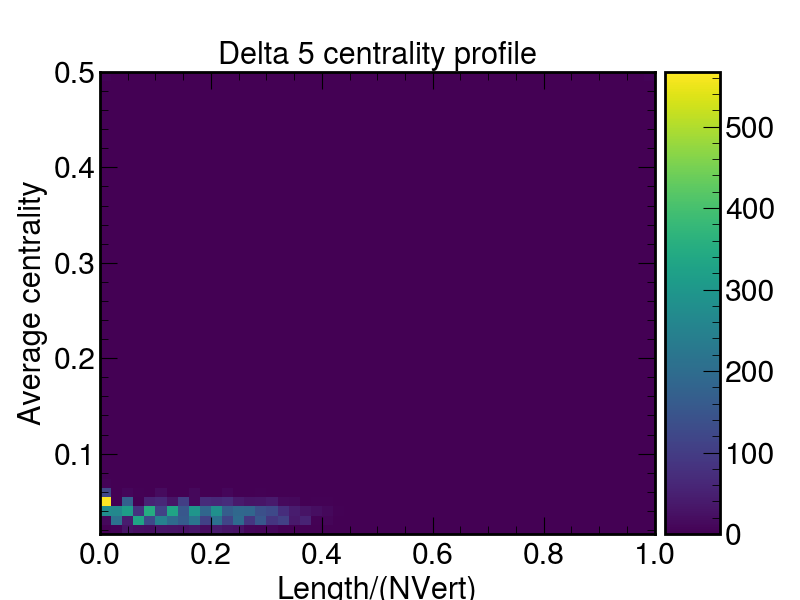

In [63]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D5CenProfArray)):
    xValues.append(np.arange(0,(len(D5CenProfArray[i])))/(D5NVerticesList[i]-1))
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in D5CenProfArray for x in xs],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Delta 5 centrality profile",fontsize=22)
plt.xlabel("Length/(NVert)",fontsize=22)
plt.ylabel("Average centrality",fontsize=22)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


<IPython.core.display.Javascript object>


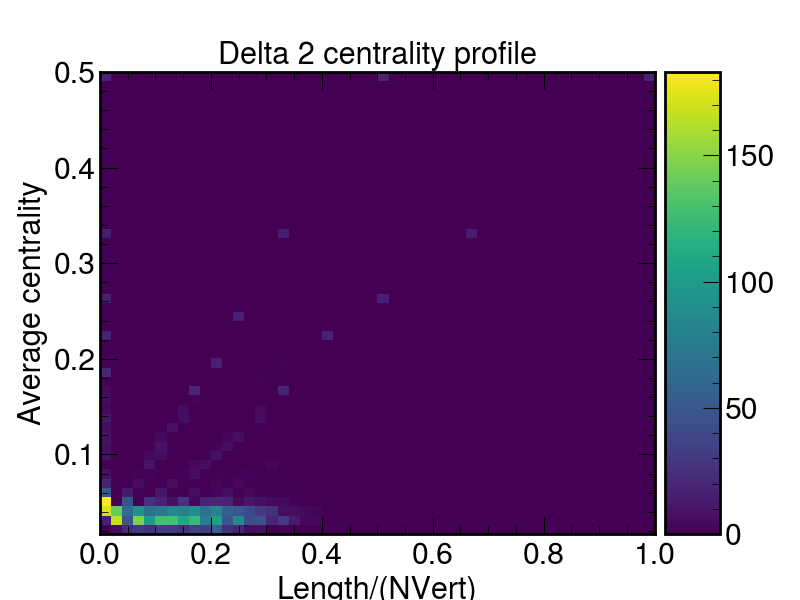

In [20]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(E50D2CenProfArray)):
    temp=np.arange(0,(len(E50D2CenProfArray[i])))/(E50D2NVerticesList[i])
    xValues.append(temp)
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in E50D2CenProfArray for x in xs],bins=50)



extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.clf()
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower',aspect='auto')
plt.title("Delta 2 centrality profile",fontsize=22)
plt.xlabel("Length/(NVert)",fontsize=22)
plt.ylabel("Average centrality",fontsize=22)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


In [21]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D5CenProfArray)):
    xValues.append(np.arange(0,(len(D5CenProfArray[i])))/(D5NVerticesList[i]-1))

hCom_xy = hist.Hist(
    hist.axis.Regular(50, 0, 1.05, name="x",overflow="False"), hist.axis.Regular(50, 0, 1, name="y")
).fill(x=[x for xs in xValues for x in xs],y=[x for xs in D5CenProfArray for x in xs])
hpCom = hCom_xy.profile("y")


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D2CenProfArray)):
    temp=np.arange(0,(len(D2CenProfArray[i])))/(D2NVerticesList[i]-1)
    xValues.append(temp)

hInc_xy = hist.Hist(
    hist.axis.Regular(50, 0, 1.05, name="x",overflow="False"), hist.axis.Regular(50, 0, 1, name="y")
).fill(x=[x for xs in xValues for x in xs],y=[x for xs in D2CenProfArray for x in xs])
#print(h_xy)
hpInc = hInc_xy.profile("y")
fig=plt.figure(figsize=(8,6),dpi=100)
hpCom.plot(label='Delta 5')
hpInc.plot(label='Delta 2')
plt.title("Centrality profile",fontsize=22)
plt.xlabel("Length/(NVert-1)",fontsize=22)
plt.ylabel("Average centrality mean",fontsize=22)
plt.legend()
plt.show()


NameError: name 'D2CenProfArray' is not defined

In [70]:
incWassenstein=[]
comWassenstein=[]

comProfileY,comProfileXEdges =hpCom.to_numpy()
comProfileX=[(comProfileXEdges[i]+comProfileXEdges[i+1])/2 for i in range(len(comProfileXEdges)-1)]
mask=np.logical_not(np.isnan(comProfileY))
comProfileY=comProfileY[mask]
comProfileX=np.asarray(comProfileX)[mask]

for i in range(450):
    incV=np.arange(0,(len(D2CenProfArray[i])))/(D2NVerticesList[i]-1)
    incWasserstein=scipy.stats.wasserstein_distance(comProfileX,incV
                                                 ,u_weights=comProfileY,v_weights=D2CenProfArray[i])
    #print(wassenstein)
    incWassenstein.append(incWasserstein)
    
    comV=np.arange(0,(len(D5CenProfArray[500:][i])))/(D5NVerticesList[500:][i]-1)
    comWasserstein=scipy.stats.wasserstein_distance(comProfileX,comV
                                                 ,u_weights=comProfileY,v_weights=D5CenProfArray[500:][i])
    #print(wassenstein)
    comWassenstein.append(comWasserstein)



<IPython.core.display.Javascript object>


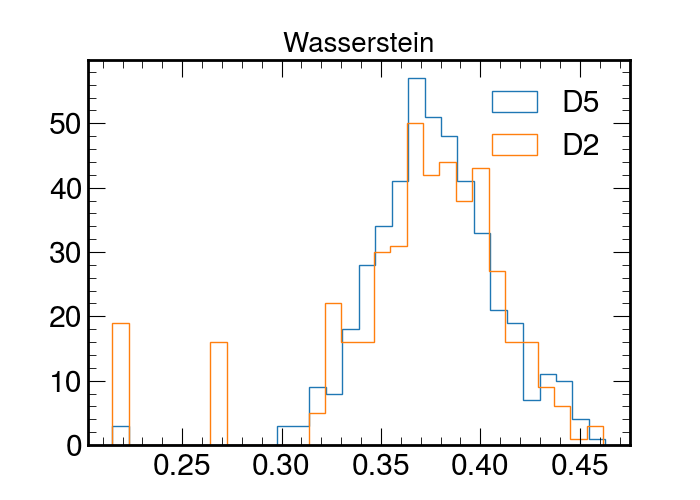

In [71]:
plt.figure(figsize=(7,5))
plt.title("Wasserstein",fontsize=20)
plt.hist(comWassenstein,histtype="step",bins=30,label="D5")
plt.hist(incWassenstein,histtype="step",bins=30,label="D2")
plt.legend()
plt.show()

In [46]:

D5DistProfArray=[]
D5NVerticesList=[]

N=100
for evt in range(N):
    print(evt)
    for tr in range(min(len(verticesD5_indexes[evt]),2)):
        #print(tr)
        v_layers=verticesD5_layers[evt][tr]
        v_ind=verticesD5_indexes[evt][tr]
        v_x=verticesD5_x[evt][tr]
        v_y=verticesD5_y[evt][tr]
        v_z=verticesD5_z[evt][tr]
        v_E=verticesD5_E[evt][tr]
        TrNet=Network(v_ind,v_x,v_y,v_z,v_E)
        edges_1 = TrNet.edgeBuilderNew()
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        c_nxpr_undir=TrNet.nXCentralityPageRank(v_ind,edges_1,False)
        adjMatrix=TrNet.adjM(v_ind,edges_1)

        distProfList=TrNet.distanceProf(adjMatrix,np.argmax(c_nxpr_undir))
        D5DistProfArray.append(distProfList)
        D5NVerticesList.append(len(v_ind))
        

0
1.8687717065251377
1.1623987086694
2.1858431190375995
1.0688767529836127
2.1880911100990375
1.1503640613178732
2.1565657665245794
1.1792452154552961
2.131354577761556
1.144095049221562
2.0203089395512848
1.2962039894348436
2.6344090433556175
0.827647873221963
6.6924665480852354
3.1200574139068635
1.2011968500755188
0.8072647896547096
2.7044875833034894
2.172514672205523
1.0567778567405526
1.0857308348504944
2.309583981820481
3.247386154176013
1.1423601209671688
2.202669350221356
1.0850510468271182
2.2099071282930822
1.0348604546337015
3.2215205852259032
1.204511800787941
2.424529536590171
1.152896302144029
2.58232318201442
0.7115042314598554
1.1304559537064165
4.073839535797333
0.6837176320135541
4.264601078941439
1.233743228847743
0.7769381364460628
1
2.060428526437306
1.1490988735343421
2.1651083417331733
1.123816676556487
2.1698286120891908
1.0919328305886324
4.3374801055016405
1.0442561633838068
2.2282271062902623
1.1592086743551135
2.214259098401783
1.0911224469697345
2.10576121

0.919469264833026
2.3532617306607904
1.19907522140727
1.0492157494177832
2.2306900080996
1.1351501530523365
2.137192999804938
1.1476833024684652
2.185711248764278
1.1347530903216807
2.1724341733254846
1.0382120019945091
2.201821576904308
1.0275186947552015
3.2109441254310127
0.49818653616119946
3.979801592737033
0.14194508387436144
0.6692126837234014
1.5444263547600485
3.463836418890935
0.9200799636459465
1.0863744261893657
0.23852506073353652
1.2819391857264577
0.9629822744045669
1.9689869333924435
0.2537772524807451
1.1910318848261454
2.1763787435478434
1.0997381237992272
2.1935354606853252
1.1212321792086186
3.296177681461188
1.120536790031963
2.1172958443533503
1.1852352401248254
2.257436803496489
1.1973992923250876
2.253892529125949
1.0527101369730758
1.267821440898956
2.433897245168737
1.1081069657157059
0.913973716732869
1.2626670356209502
1.8561610212072424
3.74372042357885
8.305150772323714
0.9257805997197011
0.7149530956580747
1.0207083617543162
1.6698552961099722
0.684769206

2.290339362652446
1.2517533136706334
2.1294576243047345
1.1088562885657893
2.2144061496753693
1.1149776950812225
2.128484632711775
1.2066965276915198
2.0724353839472087
1.1657247896503122
3.2941379027114976
1.0807374322622536
3.464421497415799
1.0549508362494748
2.6443969744829587
1.573928506272523
0.4809441534310963
2.1466516198946124
3.392037831160053
0.18906784525853482
0.8500457689239624
0.4906748583530316
3.1018922707529555
3.364594542603527
1.0041537267454714
2.151573148476473
1.2689589444016178
1.982234545748895
1.1599740840507593
2.1597545931647915
1.0944840164116272
2.2253216001926717
1.128189871827601
2.0887851933704837
1.1850190855643064
3.208435538834806
1.2906759518841682
3.394293906657879
1.170823305040301
2.6976514642286133
0.6566037979916359
2.546066584428786
7.3845286401951284
0.9820296686299912
3.2312042842842175
19
1.0628176098999802
2.1389665607558754
1.1054715401451176
2.1918134261225646
1.1208283066505942
2.2063290619032614
1.1021160481811876
2.173609131453361
1.0

0.025586379388300884
2.2730314090513275
0.9759058052402452
2.2596322812927383
1.2491067415016346
3.377995912046231
1.05646908660691
2.215134255510975
1.0946077695477356
2.162953256193987
1.0783780702511763
2.230013245302871
1.1019639690912868
2.2914583532096344
0.8296990491514862
2.595388808062296
1.1755050669713114
2.4562821448337218
1.5348193125877856
0.4762082630142572
1.397612532377991
4.461830903434077
3.372966589870714
0.04927888300375116
1.3757880789032697
1.3652422681300322
3.627790505623352
1.25333549449266
27
1.0991879793750172
2.2272481484724267
1.075816552956951
2.135039303436656
1.1545322516151941
2.1709059976018352
1.1496656181725484
2.1294889651071003
1.1809903433128852
1.0269996878258212
2.2011275933903676
4.663902739104287
1.4539394524009595
1.143766943557523
2.2321727607254047
0.9149941659665615
0.9334441346021549
0.9824004065943086
0.08367300122591814
2.9448321264714536
2.480592036184248
1.5177932156994416
2.1988162374549916
0.8186266312626458
1.1631256210779384
1.91

2.1126518417525517
1.1138045029425712
2.186425929878851
1.1405618650711062
2.206910636731095
1.1876805531683203
3.198759791800171
1.0824629769109606
2.2492200894274674
1.10033438102937
2.1851924959890994
1.0040465710336548
2.267758020956421
1.156107449026706
2.2238360635522554
0.9122014301310628
1.0232823648728981
2.6012910798422126
0.35187015287982604
1.948148627630701
0.06433673678327523
2.0085403487076405
3.395803582019255
1.9812960420659351
2.658496118811911
3.5509847050284975
1.6089334400708708
2.2486144872283944
1.0252608939423453
2.2981603783238143
1.0923697345645564
0.5475212026560712
2.1914415920632564
1.1287661528465947
3.3440369075681815
1.0882961041181147
3.279064071772325
1.1817608857200526
2.2536804773730523
0.9479358458758043
0.7338552895596422
2.184079016454973
3.0194925164133224
1.1613601457218579
1.2083589887209314
0.09771304884026222
0.06568155220980998
2.8921488501042063
3.6132044135529213
1.4726747405650258
3.2130945943643496
1.9398349768235903
0.7640271566544925
3

0.7616809819595574
2.22037902913587
1.0569847793781832
2.2855997414418994
1.0642660022973587
2.238305115450771
1.119639442729806
2.1833507012702853
1.0879083869230044
3.324658912263942
1.1231804361657396
3.273374507221604
1.122510485920941
2.099853947325471
1.1588769807710264
4.619499571131996
1.2485765556522779
2.591499680145546
1.0990290869273167
3.3976704373977213
1.4768986517886447
4.143323930285192
0.4880152420911372
0.6302933108974571
4.657564151589099
1.2519620964185378
0.712030216849314
1.1266671976921998
2.156133283438578
1.1494078290410812
2.190702636115418
1.1348549324791861
3.313171238416885
1.0747446935631046
2.183948173941417
0.9924119585900257
1.2830144913139065
3.269167807514634
0.8035849030765689
0.033998642219273734
1.1916766662312739
3.356317853888413
1.614884177209376
1.6431837285373945
1.148889947893224
2.503172377586168
1.2140300832049888
2.028403766354927
1.6866231291789404
0.8467448777740856
3.589721795550588
8.070225563598854
1.6021150466127096
45
1.23723361437

1.2932748481458134
2.1484035836979274
0.9849320152061978
2.2698895422224155
1.0849468962755964
2.2401600649544093
1.1098810955696763
2.141000531918735
1.1979702939747199
1.3229344355683565
2.1389731411327944
2.6775022857725617
1.1182191751921096
3.2307282634268972
1.1598183939880187
3.7912179587063974
1.0316885800987734
2.3933328808361125
1.63904007763864
2.0348372958970913
1.6554797069958909
3.3273228018720147
0.9185782930683217
2.173607955013267
1.2065712879555122
2.1688565617056383
1.0867519752463863
2.2211932002431354
1.0692332132202864
2.199268978310897
1.0713959588377406
2.250876331967902
1.1574087547963359
2.4432505598832677
0.06944540737930538
1.3720287788059409
1.6688554842693861
2.7287000519236244
2.405079816321802
0.2948913199294907
1.204882664684078
1.3256260786475877
2.576395104919129
1.0771607465872535
3.172206698281286
1.064282342143656
0.8196205119317028
2.740959271900522
0.29453620716770956
1.2232804875585543
1.2002657155161955
54
2.3606251488351404
1.0752496073062048


1.1126045952244112
2.1922306097516753
1.1008021296482866
2.1712387368938835
1.126215731981688
2.1648765807262293
1.1236957629338917
2.166407342162472
1.1519325995158738
2.1750257262031596
1.120409585180255
2.002108832603085
1.137401667932636
2.5187108465401593
0.6301625845547392
2.114351284061513
2.292621001648115
2.2014186652620538
0.8657763994941661
2.7444222529107947
4.314573214325264
0.6161195433908802
1.9552083851887687
0.750671536486152
62
1.0877000916315183
0.0038545439974200235
2.1842845194740335
1.0606323470418033
2.2073924417714466
1.1837946343412113
2.133668830513102
1.1383846092842873
2.140949839297946
1.0316007620094751
2.1971623344670093
1.2097533637754054
2.044588820044794
1.1969064582463602
3.3427544314978945
1.04454334437321
0.49491021308000427
2.5740887748709724
2.531944534350714
0.6936399292877695
3.5232038124311202
0.8484641599764018
1.0026312254136087
3.380736872537341
2.8636695945119186
0.015476332248852032
2.03114213413005
0.5259047636442347
0.7059859607176691
3.

2.502693330649265
1.1210600602412342
1.247852951337336
2.142971860479122
1.1248748304827814
2.1353695676340294
1.0424209286931614
2.2167249448915527
1.1660502728336155
1.1774683435049837
2.223589171430092
1.0444648137244599
2.11598617793436
1.2519530362706632
0.33517237346597994
2.1350554237912434
1.9549930208173123
2.316058427288908
0.3077698812697349
0.9632364658638721
0.023427073959453537
2.269305951403851
0.8245604478873929
1.3000704871724906
0.7086456336349443
0.7059992051344466
2.9924558607741005
1.7038108893583512
1.2506723223323206
5.682105793783251
1.7728607814309498
2.901282429389937
1.166210785551641
2.2047465540397297
1.149428341544649
2.120452645204125
1.1648592766378556
3.2977265056283045
1.1274966988097503
2.190364066426582
1.1300897862037687
3.317398340746479
1.0365708410656111
3.2511832937508416
0.27181973874775167
1.1773836346923758
3.38140430168437
2.924975814158131
1.1042008447516878
2.4840348690455585
1.239416758349762
2.528174785050396
1.03167605717789
0.157972996

2.156709653781718
0.9832091688601281
2.240878317845443
1.1106929595021597
2.130264468505686
1.1719913059379223
3.3900043720827853
1.0883804630649934
2.1423809202019584
1.1548655178156082
3.4304635918537087
0.8639538503210247
3.203889628016668
1.1089648280993174
3.3299237338462717
1.1674012067940112
3.526560571802463
0.07981141542171599
1.38030965774675
0.11454063321457397
4.568509590663325
2.4151828432470666
0.21570200102138415
1.2098073618180365
1.19336094041455
1.8817542680488941
6.029574925795259
1.3087292828773798
2.162490974812215
1.0082904143061455
2.242428712685694
1.0075679622939901
2.2772175735789233
1.134586577490552
2.147370734856736
1.126723043362972
2.1614679393190386
1.09981635481671
3.4317264157636487
0.9993662837658235
3.144378772389757
1.2780038931157947
0.6673654896567882
2.346444620854413
0.7389997165631712
3.325346405219477
0.8678013427314681
80
0.919527204466192
2.369257145335439
1.160796623942531
2.17529480118759
1.0306676451278918
3.2895797638627755
1.14029476691

1.0080018076433817
2.2434498184984477
1.0572427939934528
2.274136551692038
1.1501448329587447
3.25620837996064
1.152547223942122
5.444802748004463
2.164724993398522
1.1600920747514465
1.1285975068573748
2.1612085974801403
1.1464998732885192
2.1229010476426993
1.214245774894323
3.3374457969579794
1.127157594580808
2.465672038083426
1.0716363547458627
2.384110869152323
8.502372533794983
3.864703742604206
0.21405140664160172
0.9945359801657787
2.3612960701022416
1.1077505297198513
2.370310048008605
1.070348578307005
2.187424542757867
1.048228344379254
2.2175694734064564
1.197893336647894
2.148927858451259
1.1585043346810266
2.208049944073423
1.1247640334448192
2.2180658905080577
1.0130803979731127
3.3897877824971374
1.238328466834787
2.6137015575305895
5.758988724235508
1.8512867985998014
0.24751243682402446
0.46935070313884353
4.665653132530451
0.933239547066762
0.7996754991402213
2.8199350953654516
1.5710666877488961
0.7548246106286456
2.3142294926885825
89
0.9248750165740489
2.23059185

0.3630069981812767
0.683244239224166
2.312296774416268
1.1133408977564727
1.4597846410666193
2.182553729532856
1.1012891706733399
2.1817796948944874
1.1109843944156523
3.250637068647791
1.0619136280608927
2.1645885627458483
1.1249750457570258
2.2452626407793446
1.1233835086487716
2.2930406190095596
1.0566541988230824
3.2537198137956693
0.7209490065021669
2.8631484637103313
0.9406918712358561
0.36967091417267284
3.717743074314228
0.04585571345188555
0.8424486864914797
1.6741137983438534
0.5048182856087919
0.9412585532587059
4.625937893637058
2.6988369481055656
2.050673697066429
1.2333261330762184
2.043695563827498
1.1513647969932208
2.1493804254739075
1.1275685454659197
2.1717181150905844
1.1055634367891685
2.25966603338253
1.1750701668909755
2.093785299726619
1.0274929269995141
2.3096536688671563
1.0672876843026984
2.1671429321397113
1.1340849914707292
2.597920435967751
1.260363853357319
0.9114450970964754
3.861606191298847
3.8584127685189173
2.363920817590042
0.22467054109154105
0.370

In [47]:

D2DistProfArray=[]
D2NVerticesList=[]

N=100
for evt in range(N):
    print(evt)
    for tr in range(min(len(verticesE50D2_indexes[evt]),2)):
        #print(tr)
        #v_layers=verticesE50D2_layers[evt][tr]
        v_ind=verticesE50D2_indexes[evt][tr]
        v_x=verticesE50D2_x[evt][tr]
        v_y=verticesE50D2_y[evt][tr]
        v_z=verticesE50D2_z[evt][tr]
        v_E=verticesE50D2_E[evt][tr]
        TrNet=Network(v_ind,v_x,v_y,v_z,v_E)
        edges_1 = TrNet.edgeBuilderNew()
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        c_nxpr_undir=TrNet.nXCentralityPageRank(v_ind,edges_1,False)
        adjMatrix=TrNet.adjM(v_ind,edges_1)

        distProfList=TrNet.distanceProf(adjMatrix,np.argmax(c_nxpr_undir))
        D2DistProfArray.append(distProfList)
        D2NVerticesList.append(len(v_ind))
        

0
1.0090038294049464
2.3524905422318625
1.125571000020443
2.1537721935657146
1.060140064294501
3.3244544817865744
1.0787648452148346
3.2302478049099363
1.0024541786925738
3.3037025563177167
1.035139576026836
1.2439134870721773
3.604488247488746
2.099092062570037
1.1404126415610563
0.6015763376395853
3.4644206402265922
1.403743223057404
1.5643657792099361
2.438025091258339
1.5254507117671778
0.9796755344294183
3.490676219124907
1.3485619144465204
2.506209677225513
0.2948167092675362
1.0899100786924123
2.899724182331113
0.14585705987775555
1.148344597797177
2.4613196182186243
5.464170584728322
2.0042845528959674
1.069666589657345
1.1935551231533168
1.5228383773387009
1
2.3756420304413837
0.9100006858161578
2.330765229364829
1.0301522147651667
1.0318059413098126
0.07801826981113891
2.13583841694134
1.2112796042176797
2.06574310254274
1.1905351436191154
2.1812438364083278
1.1008491689253788
2.1373248864102266
1.1553690999605806
3.373918926689612
0.12801566155542332
1.1326658841941253
1.763

3.279304170989235
10.15574782604989
1.080332981227457
2.051498107691941
15
1.004479589301127
2.3152980835439507
1.0659698307225085
2.197341737300917
0.965950596053915
2.3163034681871295
1.0323369985209183
2.2171718262733293
1.0548309363782096
2.209427599987521
1.1990619714626405
2.1296689032674863
1.2157916688269665
0.02835672523588073
2.0762043261146914
2.077342105998923
0.47960944615118706
1.1156579709285097
2.8907320516253776
2.2303828672543773
1.645102330116913
1.6411622906786079
5.4998519107628
0.05476245077790054
0.10509157905715938
2.3086168264048297
4.062394899791116
16
2.6283010776998594
1.1057483312268346
2.1967907865656002
1.0830570539989708
3.200570442037531
1.20204344397888
0.32091499385825273
2.1847504919950893
2.802996161608462
1.064992507267334
1.843663245857897
2.3797195994686717
0.9014581754930759
3.1744479746764114
0.4490438089137001
1.076930493881946
1.6789503604204015
2.200593945598712
1.463228533724532
1.2881803678424149
1.1227800915104922
1.067197258712099
3.3016

1.0090586117001976
2.1617832809620836
1.3213858756495824
1.9399985970123907
1.2930104656830963
3.3986050820888067
1.21467244270508
2.1646034992379555
1.0235375620483183
3.2537479111144307
1.0130457569873101
0.7196448374657507
2.2429057211259646
1.0288028757119037
0.4329781930432546
3.207740507140784
0.6127689883070957
0.2778199339814478
1.3862215943046294
1.7895637276431557
0.6712562841329941
0.22206105518688446
2.59147253802098
1.9707331455064718
3.4570877197907635
0.15538691217085443
0.6233961799642316
0.5858333905376867
2.721874490997152
1.7434824831270817
1.5507764147270677
0.3337458412943306
6.8008281534988555
31
2.215444337153258
1.1028361048172997
2.220785646224499
1.0504948859293677
2.185325366443408
1.2031354863063939
2.1896948684906192
1.038354786313505
2.1803806338366485
1.1390186417581276
2.1065397104599697
1.2161823367445663
0.918642175823777
2.2998059522581684
0.3327092811180705
1.0041365744304471
0.11920382569343246
2.042323978673892
2.7404033018074756
2.935255462721557


2.283784910745055
1.071250554117455
2.203132726141689
1.2637165935569215
2.0259148387558525
1.1837309181222508
3.321465403175978
1.0459342846940558
2.1865413765686412
1.1610176441129738
2.2283096070253237
1.4051104874438352
1.0692114884085981
0.6810441654438932
2.1495026854082084
1.1820443218678065
0.9268435710083622
0.9785074305323747
3.5909844585384008
2.817782262832452
2.4967398818196784
1.251911267042999
0.19670731001451713
0.8624738007013661
2.1740636838321734
1.216993031956065
2.544902624141514
0.7905936136173182
46
1.1104895038868676
2.056972066542528
1.1977392870126664
2.1491554950364957
1.0825770993930632
3.2732609074688526
3.3644598839636046
2.057085158584698
1.0521310708928127
1.2801767350852629
0.6251426052963893
2.2063346201319405
2.5682820951560643
2.5748579724427145
2.838653651990512
1.211867310245509
3.3382730665800295
2.8626618321125648
0.0772371961566023
1.1931197807645617
3.331117569430603
0.32446592422178355
2.69028421784094
3.6362921063216618
0.4946856802474713
1.3

1.1073276622622075
2.2373000465055384
1.1205513276964894
2.2178197774932755
1.2295417635766057
3.1885723555917593
1.2985424314720149
2.1624125607059455
1.0540463364538368
3.264467790271908
1.0787548681319095
2.1114763356385993
1.1541733650722108
2.406984615895283
0.715286656197236
2.9228635529745475
1.0237003377555425
0.8766538635972552
3.5528276844405013
1.5094531197217975
2.0473372366745934
62
1.118038630914839
2.2047513467423414
1.0806268461945479
0.06034949145009705
2.1527895241045485
1.0599620703582104
1.1468058423487832
2.4835474706075047
2.282399018163119
1.058693395822445
3.3300874747705507
1.1296022146005384
2.130140470360516
1.11646672375457
3.1155373172651935
1.1790879154112872
2.150283578981032
0.9883660213472467
0.6564333643045757
2.45454183167908
0.9950537667685921
0.2820630908159387
1.688909618354728
0.3828969066103127
3.877598602043065
0.11848205340749018
2.238341111817647
1.9936788542860313
2.939946832364342
1.7141108413787265
1.6190689865079548
0.8108225899736681
0.10

0.9577780584847915
2.3380568791650944
0.9326235355452468
2.2185175383043543
3.4015926949895174
2.211244978573802
0.8771225363856274
2.47640991358179
1.0258566012312826
3.23958966646984
1.2124112852605435
3.0206696361286163
3.64677748401499
0.6534268142188466
2.893582880782617
4.273481458650394
6.371798258340959
2.5651263610094475
78
1.360358371857501
2.1315693552786
1.1885417441431514
2.1779864345408555
1.0535170437851775
1.1145687852006745
2.197602368569278
3.2754510723004273
1.0389744641367429
2.2392292681965955
1.2902111395647466
2.012310358861896
1.1712649005701223
2.143244328580977
1.128138029544516
2.506530311707934
5.941227361252118
1.0639001734222688
3.7160495342039326
1.2897983412635767
2.6506363877414287
1.9472512755829712
1.180634328079634
0.9467324115602196
0.1777931124488532
0.24139525887892432
2.532512720276145
0.6772669915167739
1.1864659945302378
2.610792867264763
2.19460857855222
0.7213476899979128
79
1.0545252949933115
2.256526267822153
1.0047362942850668
2.1646453946

2.2486013906903963
0.9475956662166141
2.262565418698898
1.0389888727601715
2.2650015836529747
1.0429116128343594
2.2653849244334197
1.150934235153784
2.0835385532095074
1.0965446910378773
3.3575477226357293
1.1177694971552228
0.407875964919981
2.0415348585016204
1.5259328359113624
1.799701303271661
0.857753705438995
1.2508615690717875
4.6160659549408365
2.071337095163642
1.1158339264341635
0.14796427352655428
1.5136389765531817
0.604806509015134
0.7405865952243857
3.5772602905511803
2.7130638920162937
0.7195232962953924
1.8376976813368628
2.205251065678908
0.2883888095865359
0.27001325101497287
95
1.5202581612011272
5.473960925414133
5.730910634145289
2.575839271008306
2.189952687190271
1.063621521227219
2.165354960452248
1.1129526034962396
2.237157411725434
1.066197011661302
2.2379665688279715
1.0060761837474388
2.2650610540969183
1.1520853415360648
2.0774480235290866
0.1020354043317866
1.1052282326423892
3.6690182442174546
2.18744079064237
1.3845332837469186
3.9366934634753648
1.3989

In [37]:
for i in range(len(verticesE50D2_z)-2):
    print(verticesE50D2_z[0,0,i+1]-verticesE50D2_z[0,0,i])

0.993988037109375
2.063018798828125
0.993988037109375
2.06298828125
0.9940185546875
2.06298828125
0.0
0.9940185546875
2.06298828125
0.993988037109375
0.0
2.063018798828125
0.993988037109375
2.06298828125
0.0
0.0
0.9940185546875
2.06298828125
0.0
0.9940185546875
0.0
2.38800048828125
0.993988037109375
0.0
2.38800048828125
0.0
0.0
0.993988037109375
0.0
2.38800048828125
0.0
0.9940185546875
0.0
2.38800048828125
0.0
0.993988037109375


ValueError: in ListOffsetArray64 attempting to get 37, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21)

<IPython.core.display.Javascript object>


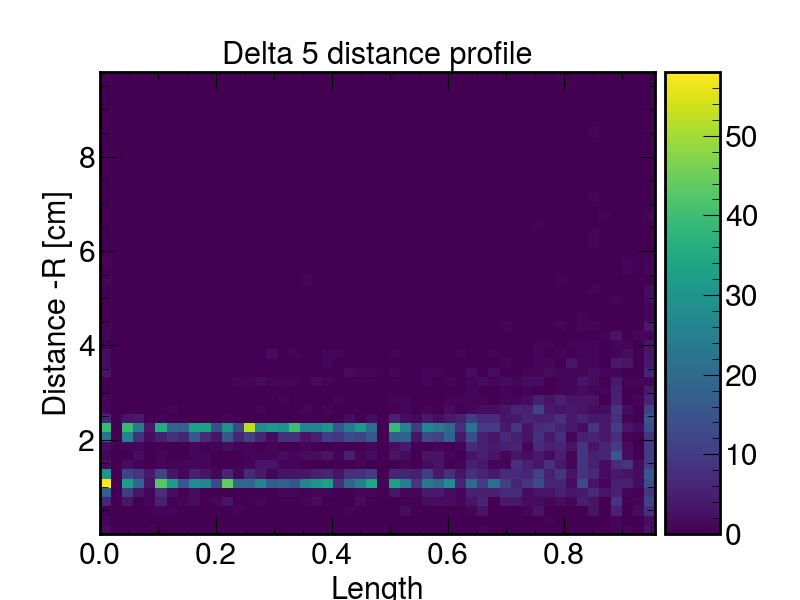

<IPython.core.display.Javascript object>


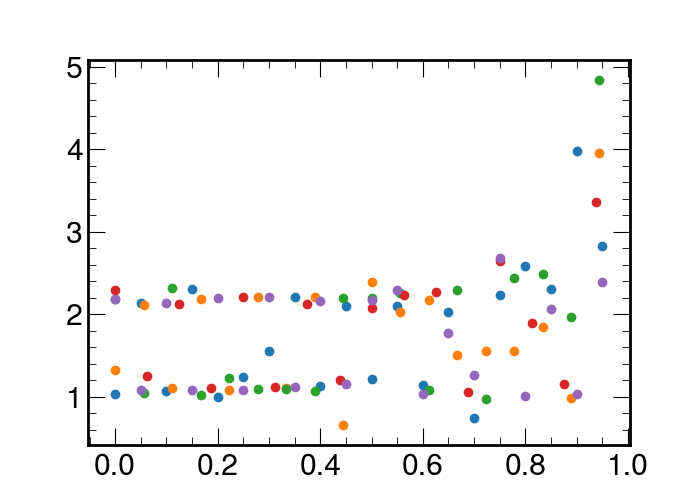

In [53]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D5DistProfArray)):
    xValues.append(np.arange(0,(len(D5DistProfArray[i])))/(len(D5DistProfArray[i])))
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in D5DistProfArray for x in xs],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Delta 5 distance profile",fontsize=22)
plt.xlabel("Length",fontsize=22)
plt.ylabel("Distance -R [cm]",fontsize=22)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])
n=0
plt.figure(figsize=(7,5))
for n in np.random.randint(0,99,5):
    plt.scatter(xValues[n],D5DistProfArray[n])
plt.show()

<IPython.core.display.Javascript object>


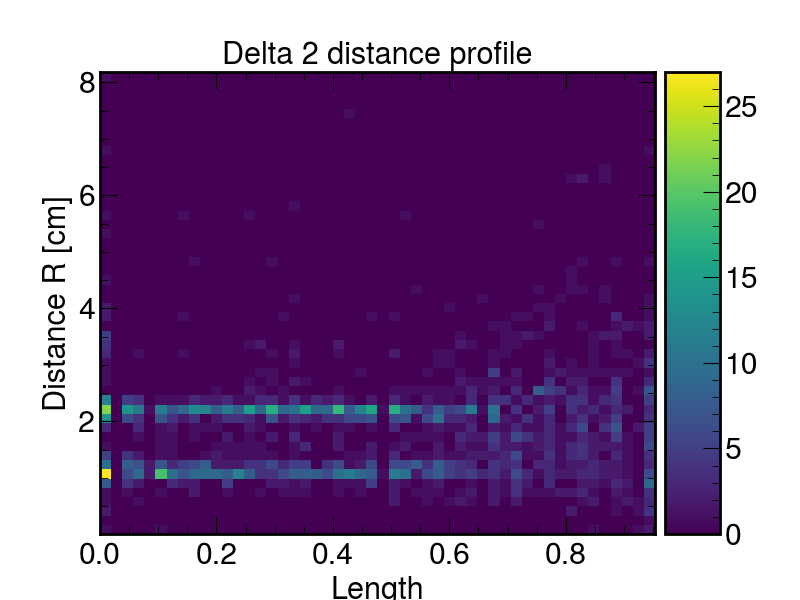

In [52]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(D2DistProfArray)):
    xValues.append(np.arange(0,(len(D2DistProfArray[i])))/(len(D2DistProfArray[i])))
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in D2DistProfArray for x in xs],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Delta 2 distance profile",fontsize=22)
plt.xlabel("Length",fontsize=22)
plt.ylabel("Distance R [cm]",fontsize=22)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


<IPython.core.display.Javascript object>


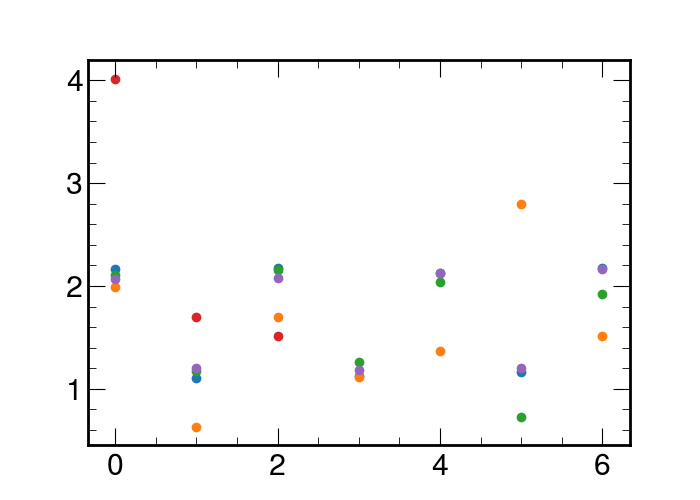

In [25]:
plt.figure(figsize=(7,5))
for n in np.random.randint(0,99,5):
    plt.scatter(xValues[n],D2DistProfArray[n])
plt.show()